## 딥러닝 기초 이론 
 1. 선형회귀 모델
 2. 로지스틱 회귀모델
 3. 퍼셉트론, 다층 퍼셉트론
 4. 오차 역전파, 활성화 함수, 경사하강법

###### 출처:더북(https://thebook.io/), 모두의 딥러닝 개정 3판

### 1.선형 회귀 모델 
: 선형 회귀란 독립 변수 x를 사용해 종속 변수 y의 움직임을 예측하고 설명하는 작업
#### - 최소 제곱법(method of least squares)

<img src = 'https://thebook.io/img/080324/fx-44.jpg' width= 400 height=100></img><br>

: 선형회귀 y = ax + b 에서 기울기 a 값 구하기
<br><br><br>
<img src = 'https://thebook.io/img/080324/fx-48.jpg' width= 400 height=100></img><br>

:선형회귀 y = ax + b 에서 y절편 b 구하기 

#### 선형회귀 예시 : 공부 시간과 점수
#### : 최소제곱법으로 기울기와 y 절편 구하기

In [1]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
import numpy as np
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [2]:
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값: ", mx)
print("y의 평균값: ", my)

x의 평균값:  5.0
y의 평균값:  90.5


In [3]:
## 선형회귀 y = ax + b 에서의 기울기 a 구하는 공식
## 분모 구하기 
divisor = sum([(i-mx)**2 for i in x])


In [4]:
## 선형회귀 y = ax + b 에서의 기울기 a 구하는 공식
## 분자 구하기 
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

In [5]:
print("분모: ", divisor)
print("분자: ", dividend)

분모:  20.0
분자:  46.0


In [6]:
## 선형회귀 y = ax + b 에서의 기울기 a 구하는 공식
## 기울기 a 값 구하기
a = dividend / divisor

In [7]:
## 선형회귀 y = ax + b 에서의 기울기 a 구하는 공식
## y 절편 b 값 구하기
b = my - (mx*a)

In [8]:
print("기울기 a = ", a)
print("y 절편 b = ", b)

기울기 a =  2.3
y 절편 b =  79.0


#### - 평균 제곱 오차(Mean Square Error , MSE)
: 임의의 값을 대입하여 수정하며 찾아가기 위해서 
주어진 선의 오차를 평가하기 위해 사용하는 방법,<br>
오차의 제곱값의 합을 n 으로 나눈다

<img src = 'https://thebook.io/img/080324/074_1.jpg' width= 600 height=500></img><br>


- 오차 확인 위해서 임의의 직선과 실제 값 사이 거리 측정
- 그래프의 기울기가 잘못되었을 경우 오차의 합도 증가
- 오차 = 실제값 - 예측값
##### ** 제곱을 사용하는 이유 오차값이 음수도 존재 하므로 

#### 선형회귀 예시 : 공부 시간과 점수
#### : 평균제곱오차
<img src = 'https://thebook.io/img/080324/fx-3.jpg' width= 400 height=100></img><br>


In [9]:
# 임의로 기울기 a 값과 y 절편 b 값을 지정해
# x 에따른 예측값 y'와 실제값 y를 출력한다 
fake_a = 3
fake_b = 76

def predict(x):
    return fake_a * x + fake_b

predict_result = []
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f"
          % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [10]:
# 평균 제곱 오차 
n = len(x)  
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 값을 출력합니다.
print("평균 제곱 오차: " + str(mse(y, predict_result)))

평균 제곱 오차: 11.0


#### 선형회귀 예시 : 공부 시간과 점수
#### : 경사하강법(gradient decent)

<img src = 'https://thebook.io/img/080324/080.jpg' width= 600 height=600></img><br>
: 기울기 a 와 오차 사이에는 이차함수의 관계<br>
  기울기 a가 m의 위치에 있을때 오차가 가장작다 <br>
  a1 -> m으로 이동하면서 최적의 기울기m을 찾는다 = 미분값이 0<br>
- 1. a1에서 미분을 구한다.

- 2. 구한 기울기의 반대 방향(기울기가 +면 음의 방향, -면 양의 방향)으로 얼마간 이동시킨 a2에서 미분을 구한다(그림 5-3 참조).

- 3. 앞에서 구한 미분 값이 0이 아니면 1과 2 과정을 반복한다.

> 경사 하강법은 오차의 변화에 따라 이차 함수 그래프를 만들고 적절한 학습률을 설정해 미분 값이 0인 지점을 구하는 것

<img src = 'https://thebook.io/img/080324/082_1.jpg' width= 400 height=400></img><br>

: 기울기 a 를 변화 시켜서 m 값을 찾아내는 방법 
<br></br>
<img src = 'https://thebook.io/img/080324/082_2.jpg' width= 400 height=400></img><br>
: 학습률을 너무 크게 잡으면 한 점으로 수렴하지 않고 발산

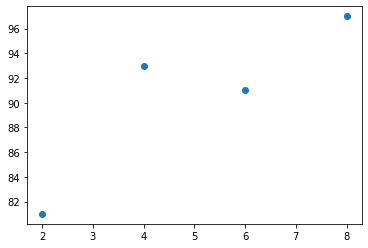

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


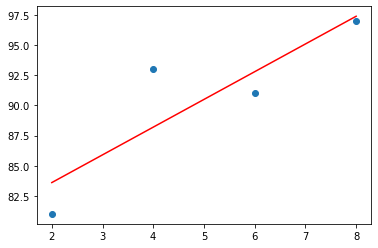

In [11]:
import matplotlib.pyplot as plt

# 공부 시간 X와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

# 기울기 a의 값과 절편 b의 값을 초기화합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다. 2000번 까지 실행위해 2001 로 값을 준다 
epochs = 2001

# x 값이 총 몇 개인지 셉니다.
n = len(x)

# 경사 하강법을 시작합니다.
for i in range(epochs):      # 에포크 수만큼 반복합니다.
    y_pred = a * x + b       # 예측 값을 구하는 식입니다.
    error = y - y_pred       # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff   # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff   # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:      # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입해 그래프를 그립니다.
y_pred = a * x + b      

# 그래프를 출력합니다.
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

- 기울기 a의 값이 2.3에 수렴하는 것과 y 절편 b의 값이 79에 수렴,<br> 우리가 최소 제곱법을 이용해 미리 확인한 값과 동일 

- 학습률 0.03 (learning rate) 임의 설정, <br>

여러 학습률을 적용해 보며 최적의 결과를 만드는 학습률을 찾아낸 것입니다. 최적의 학습률은 데이터와 딥러닝 모델에 따라 다르므로 그때그때 찾아내야 합니다. 앞으로 배우게 될 딥러닝 프로젝트에서는 자동으로 최적의 학습률을 찾아 주는 최적화 알고리즘들을 사용합니다.

#### 다중선형 회귀
<img src = 'https://thebook.io/img/080324/fx-51.jpg' width= 300 height=100></img>

#### 다중선형 회귀 예시 : 공부시간, 과외시간, 성적

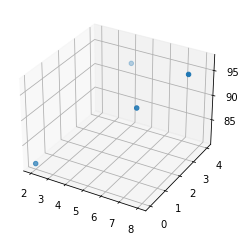

In [12]:
# 독립변수 2개, 종속변수 1개
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y);
plt.show()

<img src = 'https://thebook.io/img/080324/089_1.jpg' width= 400 height=400></img>
<br></br>
: 2차원에서 선형회귀는 선을 그리는 작업, 3차원이 되면 평면을 그리는 작업

In [13]:
# 기울기 a의 값과 절편 b의 값을 초기화합니다.
# 독립변수 2개 이므로 기울기 값도 2개 
a1 = 0
a2 = 0
b = 0

# 학습률을 정합니다.
lr = 0.01 

# 몇 번 반복될지 설정합니다.
epochs = 2001 

# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다.
n = len(x1)

# 경사 하강법을 시작합니다.
for i in range(epochs):             # 에포크 수만큼 반복합니다.
    
    y_pred = a1 * x1 + a2 * x2 + b  # 예측 값을 구하는 식을 세웁니다.
    error = y - y_pred              # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a1_diff = (2/n) * sum(-x1 * (error))  # 오차 함수를 a1로 편미분한 값입니다.
    a2_diff = (2/n) * sum(-x2 * (error))  # 오차 함수를 a2로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))        # 오차 함수를 b로 편미분한 값입니다.
    
    a1 = a1 - lr * a1_diff      # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff      # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff         # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:   # 100번 반복될 때마다 현재의 a1, a2, b의 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))


epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [14]:
print("실제 점수: ", y)
print("예측 점수: ", y_pred)

실제 점수:  [81 93 91 97]
예측 점수:  [80.76387645 92.97153922 91.42520875 96.7558749 ]


#### 텐서플로에서 선형회귀, 다중 선형회귀

머신러닝에서 사용하는 용어 <br>
- 가정하는 식을 머신 러닝에서는 가설 함수(hypothesis)라고 하며 H(x)라고 표기 <br>
- 기울기 a는 가중치(weight), w로 표기 <br>
- 절편 b는 편향(bias)이라고 하며, b로 표시
- 평균 제곱 오차 ➡︎ 손실 함수(loss function)
- 경사 하강법 ➡︎ 옵티마이저(optimizer)

#### y = ax + b ➡︎ H(x) = wx + b

In [15]:
! pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
# 독립변수 1개 종속변수 1개
# 단순 선형 회귀 텐서플로
model = Sequential()
model.add(Dense(1,input_dim=1,activation='linear'))
model.compile(optimizer='sgd',loss='mse')
model.fit(x,y,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 480ms/step - loss: 7905.0728
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 1994.5840
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 1121.1295
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 987.5242
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 962.6188
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 953.7129
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 947.1909
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 941.0527
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 935.0044
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 929.0029
Epoch 11/2000
1/1 [==============================] - 0s 4ms/step - loss: 923.0410
Epoch 12/2000
1/1 [==============================] - 0s 10ms/step - loss: 917.1179
Epoch 13/2000
1/1 [

1/1 [==============================] - 0s 4ms/step - loss: 521.4102
Epoch 101/2000
1/1 [==============================] - 0s 3ms/step - loss: 518.0878
Epoch 102/2000
1/1 [==============================] - 0s 3ms/step - loss: 514.7869
Epoch 103/2000
1/1 [==============================] - 0s 3ms/step - loss: 511.5073
Epoch 104/2000
1/1 [==============================] - 0s 3ms/step - loss: 508.2490
Epoch 105/2000
1/1 [==============================] - 0s 3ms/step - loss: 505.0118
Epoch 106/2000
1/1 [==============================] - 0s 3ms/step - loss: 501.7957
Epoch 107/2000
1/1 [==============================] - 0s 4ms/step - loss: 498.6003
Epoch 108/2000
1/1 [==============================] - 0s 3ms/step - loss: 495.4256
Epoch 109/2000
1/1 [==============================] - 0s 3ms/step - loss: 492.2714
Epoch 110/2000
1/1 [==============================] - 0s 3ms/step - loss: 489.1378
Epoch 111/2000
1/1 [==============================] - 0s 2ms/step - loss: 486.0243
Epoch 112/2000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 279.7764
Epoch 199/2000
1/1 [==============================] - 0s 2ms/step - loss: 278.0185
Epoch 200/2000
1/1 [==============================] - 0s 2ms/step - loss: 276.2722
Epoch 201/2000
1/1 [==============================] - 0s 3ms/step - loss: 274.5370
Epoch 202/2000
1/1 [==============================] - 0s 3ms/step - loss: 272.8132
Epoch 203/2000
1/1 [==============================] - 0s 3ms/step - loss: 271.1004
Epoch 204/2000
1/1 [==============================] - 0s 3ms/step - loss: 269.3987
Epoch 205/2000
1/1 [==============================] - 0s 3ms/step - loss: 267.7081
Epoch 206/2000
1/1 [==============================] - 0s 3ms/step - loss: 266.0284
Epoch 207/2000
1/1 [==============================] - 0s 2ms/step - loss: 264.3597
Epoch 208/2000
1/1 [==============================] - 0s 2ms/step - loss: 262.7017
Epoch 209/2000
1/1 [==============================] - 0s 3ms/step - loss: 261.0544
Epoch 210/2000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 151.9328
Epoch 297/2000
1/1 [==============================] - 0s 4ms/step - loss: 151.0027
Epoch 298/2000
1/1 [==============================] - 0s 3ms/step - loss: 150.0787
Epoch 299/2000
1/1 [==============================] - 0s 3ms/step - loss: 149.1608
Epoch 300/2000
1/1 [==============================] - 0s 3ms/step - loss: 148.2487
Epoch 301/2000
1/1 [==============================] - 0s 4ms/step - loss: 147.3425
Epoch 302/2000
1/1 [==============================] - 0s 3ms/step - loss: 146.4422
Epoch 303/2000
1/1 [==============================] - 0s 3ms/step - loss: 145.5477
Epoch 304/2000
1/1 [==============================] - 0s 3ms/step - loss: 144.6590
Epoch 305/2000
1/1 [==============================] - 0s 3ms/step - loss: 143.7761
Epoch 306/2000
1/1 [==============================] - 0s 2ms/step - loss: 142.8989
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 142.0273
Epoch 308/2000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 83.8011
Epoch 396/2000
1/1 [==============================] - 0s 3ms/step - loss: 83.3122
Epoch 397/2000
1/1 [==============================] - 0s 4ms/step - loss: 82.8265
Epoch 398/2000
1/1 [==============================] - 0s 4ms/step - loss: 82.3439
Epoch 399/2000
1/1 [==============================] - 0s 2ms/step - loss: 81.8646
Epoch 400/2000
1/1 [==============================] - 0s 2ms/step - loss: 81.3882
Epoch 401/2000
1/1 [==============================] - 0s 4ms/step - loss: 80.9149
Epoch 402/2000
1/1 [==============================] - 0s 3ms/step - loss: 80.4448
Epoch 403/2000
1/1 [==============================] - 0s 3ms/step - loss: 79.9776
Epoch 404/2000
1/1 [==============================] - 0s 3ms/step - loss: 79.5135
Epoch 405/2000
1/1 [==============================] - 0s 4ms/step - loss: 79.0524
Epoch 406/2000
1/1 [==============================] - 0s 3ms/step - loss: 78.5943
Epoch 407/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 47.7305
Epoch 496/2000
1/1 [==============================] - 0s 8ms/step - loss: 47.4752
Epoch 497/2000
1/1 [==============================] - 0s 4ms/step - loss: 47.2215
Epoch 498/2000
1/1 [==============================] - 0s 3ms/step - loss: 46.9695
Epoch 499/2000
1/1 [==============================] - 0s 2ms/step - loss: 46.7191
Epoch 500/2000
1/1 [==============================] - 0s 3ms/step - loss: 46.4704
Epoch 501/2000
1/1 [==============================] - 0s 3ms/step - loss: 46.2232
Epoch 502/2000
1/1 [==============================] - 0s 3ms/step - loss: 45.9777
Epoch 503/2000
1/1 [==============================] - 0s 3ms/step - loss: 45.7337
Epoch 504/2000
1/1 [==============================] - 0s 3ms/step - loss: 45.4913
Epoch 505/2000
1/1 [==============================] - 0s 4ms/step - loss: 45.2505
Epoch 506/2000
1/1 [==============================] - 0s 3ms/step - loss: 45.0112
Epoch 507/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 28.8926
Epoch 596/2000
1/1 [==============================] - 0s 3ms/step - loss: 28.7592
Epoch 597/2000
1/1 [==============================] - 0s 3ms/step - loss: 28.6267
Epoch 598/2000
1/1 [==============================] - 0s 3ms/step - loss: 28.4951
Epoch 599/2000
1/1 [==============================] - 0s 3ms/step - loss: 28.3644
Epoch 600/2000
1/1 [==============================] - 0s 2ms/step - loss: 28.2344
Epoch 601/2000
1/1 [==============================] - 0s 2ms/step - loss: 28.1054
Epoch 602/2000
1/1 [==============================] - 0s 3ms/step - loss: 27.9771
Epoch 603/2000
1/1 [==============================] - 0s 3ms/step - loss: 27.8497
Epoch 604/2000
1/1 [==============================] - 0s 3ms/step - loss: 27.7231
Epoch 605/2000
1/1 [==============================] - 0s 3ms/step - loss: 27.5973
Epoch 606/2000
1/1 [==============================] - 0s 4ms/step - loss: 27.4724
Epoch 607/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 19.0545
Epoch 696/2000
1/1 [==============================] - 0s 4ms/step - loss: 18.9848
Epoch 697/2000
1/1 [==============================] - 0s 4ms/step - loss: 18.9157
Epoch 698/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.8469
Epoch 699/2000
1/1 [==============================] - 0s 4ms/step - loss: 18.7786
Epoch 700/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.7108
Epoch 701/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.6434
Epoch 702/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.5764
Epoch 703/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.5098
Epoch 704/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.4437
Epoch 705/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.3781
Epoch 706/2000
1/1 [==============================] - 0s 5ms/step - loss: 18.3128
Epoch 707/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 13.9166
Epoch 796/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.8802
Epoch 797/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.8441
Epoch 798/2000
1/1 [==============================] - 0s 2ms/step - loss: 13.8082
Epoch 799/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.7725
Epoch 800/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.7371
Epoch 801/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.7019
Epoch 802/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.6669
Epoch 803/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.6321
Epoch 804/2000
1/1 [==============================] - 0s 4ms/step - loss: 13.5976
Epoch 805/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.5633
Epoch 806/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.5292
Epoch 807/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 11.2332
Epoch 896/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.2142
Epoch 897/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.1954
Epoch 898/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.1766
Epoch 899/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.1580
Epoch 900/2000
1/1 [==============================] - 0s 4ms/step - loss: 11.1395
Epoch 901/2000
1/1 [==============================] - 0s 4ms/step - loss: 11.1211
Epoch 902/2000
1/1 [==============================] - 0s 4ms/step - loss: 11.1028
Epoch 903/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0847
Epoch 904/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0666
Epoch 905/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0487
Epoch 906/2000
1/1 [==============================] - 0s 4ms/step - loss: 11.0309
Epoch 907/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 9.8319
Epoch 996/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.8219
Epoch 997/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.8121
Epoch 998/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.8023
Epoch 999/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7926
Epoch 1000/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7829
Epoch 1001/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7733
Epoch 1002/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.7638
Epoch 1003/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7543
Epoch 1004/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.7449
Epoch 1005/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.7355
Epoch 1006/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.7262
Epoch 1007/2000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 9.1000
Epoch 1096/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0949
Epoch 1097/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.0897
Epoch 1098/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0846
Epoch 1099/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0795
Epoch 1100/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0745
Epoch 1101/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0695
Epoch 1102/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.0645
Epoch 1103/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0595
Epoch 1104/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.0546
Epoch 1105/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0497
Epoch 1106/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0449
Epoch 1107/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.7178
Epoch 1196/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.7151
Epoch 1197/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.7124
Epoch 1198/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.7098
Epoch 1199/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.7071
Epoch 1200/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.7045
Epoch 1201/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.7019
Epoch 1202/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.6993
Epoch 1203/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.6967
Epoch 1204/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.6941
Epoch 1205/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.6915
Epoch 1206/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.6890
Epoch 1207/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 8.5182
Epoch 1296/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5168
Epoch 1297/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5154
Epoch 1298/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.5140
Epoch 1299/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.5126
Epoch 1300/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.5112
Epoch 1301/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.5099
Epoch 1302/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5085
Epoch 1303/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5072
Epoch 1304/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5058
Epoch 1305/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5045
Epoch 1306/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5032
Epoch 1307/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 8.4140
Epoch 1396/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4132
Epoch 1397/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4125
Epoch 1398/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4118
Epoch 1399/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4110
Epoch 1400/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.4103
Epoch 1401/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.4096
Epoch 1402/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4089
Epoch 1403/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.4082
Epoch 1404/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4075
Epoch 1405/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.4068
Epoch 1406/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4061
Epoch 1407/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 8.3595
Epoch 1496/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3591
Epoch 1497/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3587
Epoch 1498/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3583
Epoch 1499/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3580
Epoch 1500/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3576
Epoch 1501/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3572
Epoch 1502/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3569
Epoch 1503/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3565
Epoch 1504/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3561
Epoch 1505/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3558
Epoch 1506/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3554
Epoch 1507/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.3311
Epoch 1596/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3309
Epoch 1597/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3307
Epoch 1598/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3305
Epoch 1599/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3303
Epoch 1600/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3301
Epoch 1601/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3299
Epoch 1602/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3297
Epoch 1603/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3295
Epoch 1604/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3293
Epoch 1605/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3291
Epoch 1606/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3289
Epoch 1607/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.3162
Epoch 1696/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3161
Epoch 1697/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3160
Epoch 1698/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3159
Epoch 1699/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3158
Epoch 1700/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3157
Epoch 1701/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3156
Epoch 1702/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3155
Epoch 1703/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3154
Epoch 1704/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3153
Epoch 1705/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3152
Epoch 1706/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3151
Epoch 1707/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.3085
Epoch 1796/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3084
Epoch 1797/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3084
Epoch 1798/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3083
Epoch 1799/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3083
Epoch 1800/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3082
Epoch 1801/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3082
Epoch 1802/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3081
Epoch 1803/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3080
Epoch 1804/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3080
Epoch 1805/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3080
Epoch 1806/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3079
Epoch 1807/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.3044
Epoch 1896/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3044
Epoch 1897/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3044
Epoch 1898/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3043
Epoch 1899/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3043
Epoch 1900/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3043
Epoch 1901/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3043
Epoch 1902/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3042
Epoch 1903/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3042
Epoch 1904/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3042
Epoch 1905/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3041
Epoch 1906/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3041
Epoch 1907/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 8.3023
Epoch 1996/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3023
Epoch 1997/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3023
Epoch 1998/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3023
Epoch 1999/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3022
Epoch 2000/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3022


## 위코드 설명 
#### 1. 가설 함수 :  H(x) = wx + b 
출력되는 값(=성적)이 하나, Dense() 함수의 첫 번째 인자에 1이라고 설정 
입력될 변수(=학습 시간)도 하나, input_dim 1이라고 설정
- 활성화 함수 <br>
:입력된 값을 다음 층으로 넘길 때 각 값을 어떻게 처리할지를 결정하는 함수,<br>activation은 활성화 함수를 정하는 옵션<br>여기에서는 선형 회귀를 다루고 있으므로 'linear'라고 설정 <br>
딥러닝 목적에 따라 다른 활성화 함수를 넣을 수있음, 
시그모이드 함수가 필요하다면 
‘sigmoid’입력  

#### 2. 경사 하강법을 실행하려면 옵티마이저에 sgd라고 설정 손실 함수는 평균 제곱 오차 사용, mse라고 설정
#### 3. epochs 숫자를 model.fit() 함수에 입력.

1/1 [==============================] - 0s 96ms/step


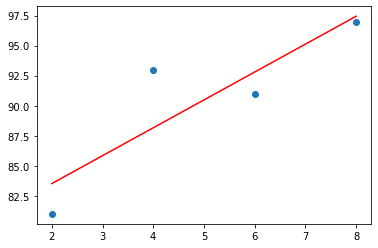

1/1 [==============================] - 0s 35ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다.


In [17]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')    # 예측 결과를 그래프로 나타냅니다.
plt.show()

# 임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
prediction = model.predict([hour])
print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다." % (hour, prediction))

In [ ]:
# 다중 선형 회귀 
# 텐서 플로 
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

model = Sequential()

# 입력 변수가 두 개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다.
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd', loss='mse')

model.fit(x, y, epochs=2000)

# 임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다." % (hour, private_class, prediction))

Epoch 1/2000
1/1 [==============================] - 0s 330ms/step - loss: 7937.8398
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 1424.5479
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 960.7532
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 922.4668
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 914.1537
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 907.9953
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 902.0339
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 896.1312
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 890.2768
Epoch 10/2000
1/1 [==============================] - 0s 3ms/step - loss: 884.4690
Epoch 11/2000
1/1 [==============================] - 0s 3ms/step - loss: 878.7069
Epoch 12/2000
1/1 [==============================] - 0s 4ms/step - loss: 872.9898
Epoch 13/2000
1/1 [==

Epoch 101/2000
1/1 [==============================] - 0s 3ms/step - loss: 494.1991
Epoch 102/2000
1/1 [==============================] - 0s 4ms/step - loss: 491.0677
Epoch 103/2000
1/1 [==============================] - 0s 4ms/step - loss: 487.9564
Epoch 104/2000
1/1 [==============================] - 0s 3ms/step - loss: 484.8646
Epoch 105/2000
1/1 [==============================] - 0s 4ms/step - loss: 481.7925
Epoch 106/2000
1/1 [==============================] - 0s 3ms/step - loss: 478.7399
Epoch 107/2000
1/1 [==============================] - 0s 4ms/step - loss: 475.7068
Epoch 108/2000
1/1 [==============================] - 0s 3ms/step - loss: 472.6930
Epoch 109/2000
1/1 [==============================] - 0s 3ms/step - loss: 469.6982
Epoch 110/2000
1/1 [==============================] - 0s 4ms/step - loss: 466.7224
Epoch 111/2000
1/1 [==============================] - 0s 3ms/step - loss: 463.7654
Epoch 112/2000
1/1 [==============================] - 0s 3ms/step - loss: 460.8274
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 265.1292
Epoch 200/2000
1/1 [==============================] - 0s 3ms/step - loss: 263.4500
Epoch 201/2000
1/1 [==============================] - 0s 3ms/step - loss: 261.7815
Epoch 202/2000
1/1 [==============================] - 0s 3ms/step - loss: 260.1235
Epoch 203/2000
1/1 [==============================] - 0s 3ms/step - loss: 258.4761
Epoch 204/2000
1/1 [==============================] - 0s 2ms/step - loss: 256.8392
Epoch 205/2000
1/1 [==============================] - 0s 3ms/step - loss: 255.2126
Epoch 206/2000
1/1 [==============================] - 0s 4ms/step - loss: 253.5962
Epoch 207/2000
1/1 [==============================] - 0s 5ms/step - loss: 251.9902
Epoch 208/2000
1/1 [==============================] - 0s 3ms/step - loss: 250.3942
Epoch 209/2000
1/1 [==============================] - 0s 3ms/step - loss: 248.8085
Epoch 210/2000
1/1 [==============================] - 0s 3ms/step - loss: 247.2328
Epoch 211/2000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 142.2590
Epoch 298/2000
1/1 [==============================] - 0s 3ms/step - loss: 141.3582
Epoch 299/2000
1/1 [==============================] - 0s 3ms/step - loss: 140.4632
Epoch 300/2000
1/1 [==============================] - 0s 3ms/step - loss: 139.5739
Epoch 301/2000
1/1 [==============================] - 0s 4ms/step - loss: 138.6901
Epoch 302/2000
1/1 [==============================] - 0s 2ms/step - loss: 137.8120
Epoch 303/2000
1/1 [==============================] - 0s 3ms/step - loss: 136.9394
Epoch 304/2000
1/1 [==============================] - 0s 3ms/step - loss: 136.0724
Epoch 305/2000
1/1 [==============================] - 0s 3ms/step - loss: 135.2108
Epoch 306/2000
1/1 [==============================] - 0s 2ms/step - loss: 134.3546
Epoch 307/2000
1/1 [==============================] - 0s 2ms/step - loss: 133.5039
Epoch 308/2000
1/1 [==============================] - 0s 3ms/step - loss: 132.6587
Epoch 309/2000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 75.8633
Epoch 397/2000


### 2. 로지스틱 회귀모델 : 참 거짓 판단

<img src = 'https://thebook.io/img/080324/100_2.jpg' width= 500 height=300></img>
<br></br>
: 합격과 불합격만 있을때 좌표표현<br>
  참(1)과 거짓(0) 사이를 구분하는 S자 형태의 선 작업

#### 시그모이드 함수

<img src = 'https://thebook.io/img/080324/fx-52.jpg' width=300 height=100></img>

<img src = 'https://thebook.io/img/080324/101.jpg' width= 500 height=300></img><br>
-  a 는 그래프의 경사도를 결정

<img src = 'https://thebook.io/img/080324/102_1.jpg' width= 500 height=300></img><br>
- b는 그래프 좌우 이동을 의미

<img src = 'https://thebook.io/img/080324/102_2.jpg' width= 550 height=500></img>
- a값에 따라 변화하는 오차를 그래프로 나타냄

<img src = 'https://thebook.io/img/080324/103.jpg' width= 550 height=600></img><br>
- b와 오차의 관계, b값이 너무 작아지거나 커지면 오차도 커진다

#### 오차공식
:시그모이드 함수의 특징은 y 값이 0과 1 사이 <br>
실제 값이 1일 때 예측 값이 0에 가까워지면 오차 증가.<br> 
실제 값이 0일 때 예측 값이 1에 가까워지는 경우 오차 증가<br> 
이를 공식으로 만들 수 있게 하는 함수가 바로 로그 함수

<img src = 'https://thebook.io/img/080324/104_2.jpg' width= 400 height=300></img>
- 기울기 양수인 로그함수 : 실제값이 0일때 사용
- 기울기 음수인 로그함수 : 실제값이 1일때 사용<br><br>

### 교차 엔트로피 오차(cross entropy error) 
<img src = 'https://thebook.io/img/080324/fx-53.jpg' width= 300 height=100></img><br>
- 실제 값이 1일 때는 -logh 그래프를 쓰고, 0일 때는 -log(1-h) 그래프

In [ ]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 교차 엔트로피 오차 함수를 이용하기 위해 'binary_crossentropy'로 설정합니다.
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(x, y, epochs=5000)

In [ ]:
# 그래프로 확인해 봅니다.
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

# 임의의 학습 시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.
hour = 7
prediction = model.predict([hour])
print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다." % (hour,
prediction * 100))

### 3. 퍼셉트론, 다층퍼셉트론 

<img src = 'https://thebook.io/img/080324/111_1.jpg' width= 600 height=200></img>

<img src = 'https://thebook.io/img/080324/111_2.jpg' width= 600 height=200></img>

<img src = 'https://thebook.io/img/080324/112_1.jpg' width= 600 height=200></img>

- 가중합(weighted sum)이란 입력 값과 가중치를 모두 곱한 후 바이어스를 더한 값을 의미합니다.

<img src = 'https://thebook.io/img/080324/113.jpg' width= 300 height=200></img>

- 퍼셉트론이나 아달라인은 모두 2차원 평면상에 직선만 가능.<br> 이 예시는 경우에 따라 선을 아무리 그어도 해결되지 않는 상황

### XOR 문제 (퍼셉트론의 한계)

![and](딥러닝/and.png)

<img src = 'https://thebook.io/img/080324/114.jpg' width= 600 height=200></img><br>
- 퍼셉트론으로는 문제 해결 불가 <br>
-다층 퍼셉트론(multilayer perceptron),오차 역전파(back propagation)로 문제 해결 

### 다층 퍼셉트론

<img src = 'https://thebook.io/img/080324/116_2.jpg'><br>
: 퍼셉트론 두 개를 한 번에 계산

<img src = 'https://thebook.io/img/080324/117_1.jpg'><br>
- 퍼셉트론 두 개를 각각 처리하는 은닉층(hidden layer)을 만들어서 처리
- 입력층(x1,x2) -> 은닉층(NAND,OR) -> 출력층(AND)

<img src = 'https://thebook.io/img/080324/118.jpg'><br>
- 은닉층(점선)
- x1,x2 입력값, 각 값에 가중치(w)곱하고 바이어스(b)더해 은닉층으로 전송
- 은닉층의 중간 정거장 = 노드(node)
- 은닉층에 취합된 값은 활성화 함수를 통해 다음으로 전송 <Br>
: 시그모이드 함수(σ(x))를 활성화 함수라고 하면 <Br>
    <img src = 'https://thebook.io/img/080324/fx-54.jpg'><br></br>

### 결과
<img src = 'https://thebook.io/img/080324/fx-55.jpg'>

#### 각각의 가중치(w)와 바이어스(b) 값 정하기

<img src = 'https://thebook.io/img/080324/fx-56.jpg'><br>
- W1 : 은닉층에서 사용하는 Weights 
- B2 : 은닉층에서 사용하는 Bias
- W2 : 은닉층에서 전송된 데이터를 결과로 만들기 위해 사용하는 Weights
- B2 : 은닉층에서 전송된 데이터를 결과로 만들기 위해 사용하는 Bias

In [ ]:
# 만족하는 가중치와 바이어스의 조합은 많으나 뒤에서 구하는 방법 소개
# 지금은 값 지정해서 실행
# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

# NAND 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

# x1 값, x2 값을 번갈아 대입하며 최종 값 출력
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print("입력 값: " + str(x) + " 출력 값: " + str(y))

### 4. 오차 역전파, 활성화 함수, 경사하강법

<img src = 'https://thebook.io/img/080324/127.jpg'><br>


## 첫 번째 가중치 업데이트 공식 = (yo1- y실제 값) . yo1(1-yo1) . yh1

## 두 번째 가중치 업데이트 공식 = (𝛅yo1 . w31+ 𝛅yo2 . w41)yh1(1-yh1) . x1

: 두 식 모두 ‘out(1-out)’ 형태, 은닉층의 숫자가 늘어도 이러한 형태가 계속해서 나타나게 되므로, 이를 이용해 깊은 층의 계산, 깊은 층을 통해 학습할 수 있는 계기 딥러닝 시작

<img src='https://thebook.io/img/080324/128.jpg'></img><br>
- 기울기 소실 문제 발생

<img src='https://thebook.io/img/080324/129_1.jpg'><br>
-  시그모이드 함수 미분 최대치는 0.25, 1보다 작으므로 계속 곱하다 보면 0에 수렴.여러 층을 거칠수록 기울기가 사라져 가중치를 수정할 수 없다.

<img src='https://thebook.io/img/080324/129_2.jpg'><br>
- 시그모이드 함수의 문제점 보완위해 제안된 여러 함수

### 확률적 경사 하강법

 >  확률적 경사 하강법<br>
 : 전체 데이터를 사용하는 것이 아니라, 랜덤하게 추출한 일부 데이터만 사용하기 때문에 빠르고 더 자주 업데이트할 수 있다는 장점

> 모멘텀 확률적 경사 하강법(모멘텀 SGD) <br>
 :  경사 하강법과 마찬가지로 매번 기울기를 구하지만, 이를 통해 오차를 수정하기 전 바로 앞 수정 값과 방향(+, -)을 참고해 같은 방향으로 일정한 비율만 수정되게 하는 방법

<img src='https://thebook.io/img/080324/132.jpg'><br>
- 딥러닝에 사용되는 고급 경사 하강법의 변천 ( 옵티마이저 = 경사하강법)